In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Reading in the Data

df = pd.read_csv("movies.csv",encoding='latin-1')
df.head()


budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight of the Navigator     PG  1986-08-01   

   runtime  score               star   votes         writer  year  
0       89    8.1        Wil Wheaton  299174   Stephen King  1986  
1      103    7.8  Matthew Broderick  264740    John Hughes  1986  
2      110    6.9         Tom Cruise  236909       Jim Cash  1986  
3      137    8.4   Sigourney Weaver  540152  James Cameron  1986  
4       90    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [3]:
# Finding the missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [4]:
# Data Types for our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [5]:
# Changing Data Types of our columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [7]:
df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
2     Action  179800601                   Top Gun     PG  1986-05-16      110   
3     Action   85160248                    Aliens      R  1986-07-18      137   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01       90   

   score               star   votes         writer  year  
0    8.1        Wil Wheaton  299174   Stephen King  1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [8]:
# Correcting the year column

df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
2     Action  179800601                   Top Gun     PG  1986-05-16      110   
3     Action   85160248                    Aliens      R  1986-07-18      137   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01       90   

   score               star   votes         writer  year yearcorrect  
0    8.1        Wil Wheaton  299174   Stephen King  1986        1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986        1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986        1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986        1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986        1986

In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

budget                                 company  country  \
6380  245000000                               Lucasfilm      USA   
5061  237000000  Twentieth Century Fox Film Corporation       UK   
2420  200000000  Twentieth Century Fox Film Corporation      USA   
6391  150000000                      Universal Pictures      USA   
5723  220000000                          Marvel Studios      USA   
4840  185000000                            Warner Bros.      USA   
6614  200000000                               Lucasfilm      USA   
6687  200000000                 Pixar Animation Studios      USA   
2870  115000000                               Lucasfilm      USA   
6398  250000000                          Marvel Studios      USA   
5720  250000000                            Warner Bros.       UK   
4001  150000000                              DreamWorks      USA   
5954  130000000                             Color Force      USA   
4404  225000000                    Walt Disney Pictures      USA   
5309  200000000                    Walt Disney Pictures      USA   
5959  200000000                          Marvel Studios    China   
6624  250000000                          Marvel Studios      USA   
5722   78000000                               Lionsgate      USA   
3522  139000000           Columbia Pictures Corporation      USA   
1544   63000000                      Universal Pictures      USA   
5082  200000000                              DreamWorks      USA   
5943  150000000           Walt Disney Animation Studios      USA   
5500  125000000                            Warner Bros.      USA   
3750   94000000                 Pixar Animation Studios      USA   
4195  113000000                               Lucasfilm      USA   
3743   94000000                         New Line Cinema      USA   
3997  200000000           Columbia Pictures Corporation      USA   
3987   30000000                        Icon Productions      USA   
6658   75000000                      Universal Pictures    Japan   
5987   76000000                      Universal Pictures      USA   
...         ...                                     ...      ...   
3150    5000000               Copperheart Entertainment   Canada   
1498          0                          Kaijyu Theater    Japan   
3911          0                        M&M; Productions  Denmark   
1248          0                    DDM Film Corporation      USA   
3244          0                     Coproduction Office   Sweden   
6552          0                          MM Productions      USA   
6154          0                   Imprint Entertainment      USA   
5927    3000000                       Gold Circle Films      USA   
812           0                 Bandai Media Department    Japan   
5689    7000000                   Annapurna Productions      USA   
4837          0                           Capitol Films  Ireland   
3072          0            Daiei Motion Picture Company    Japan   
5227          0                     Cinema Libre Studio      USA   
3740    6000000                            Wiseau-Films      USA   
5275   10000000                 Middle Fork Productions      USA   
5869   12000000                     H2O Motion Pictures   Canada   
1050          0                   Bandai Visual Company    Japan   
3054     500000                   Santa Monica Holdings      USA   
4342          0                        M&M; Productions  Denmark   
2826          0           Polygram Filmed Entertainment       UK   
5671          0                         UK Film Council       UK   
3255          0  British Broadcasting Corporation (BBC)       UK   
5711    5000000                     Safran Company, The  Germany   
1319          0                      Planet Productions      USA   
5242          0               Parallel Film Productions  Ireland   
5917          0           Zentropa International Norway   Norway   
5699          0                        Isle of Man Film       UK 

In [10]:
pd.set_option('display.max_rows', None)

In [12]:
# Drop any Duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)

df1 = df.drop_duplicates()
df1.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
2     Action  179800601                   Top Gun     PG  1986-05-16      110   
3     Action   85160248                    Aliens      R  1986-07-18      137   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01       90   

   score               star   votes         writer  year yearcorrect  
0    8.1        Wil Wheaton  299174   Stephen King  1986        1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986        1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986        1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986        1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986        1986

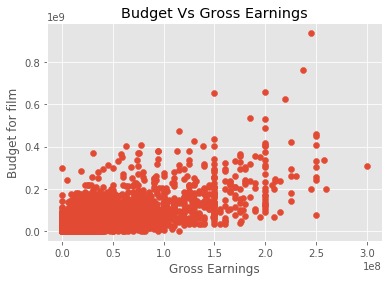

In [13]:
#Scatter Plot with Budget vs Gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title("Budget Vs Gross Earnings")

plt.xlabel("Gross Earnings")

plt.ylabel("Budget for film")

plt.show()

C:\Users\Adity\Anaconda5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


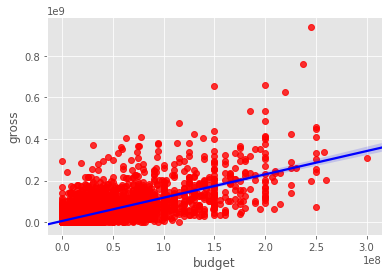

In [14]:
# PLot Budget vs Gross Using Seaborn

sns.regplot(x='budget',y='gross', data=df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

In [15]:
# Lets start looking at Correlation

In [28]:
df.corr()

budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000

In [ ]:
# High Correlation Between Budget and Gross

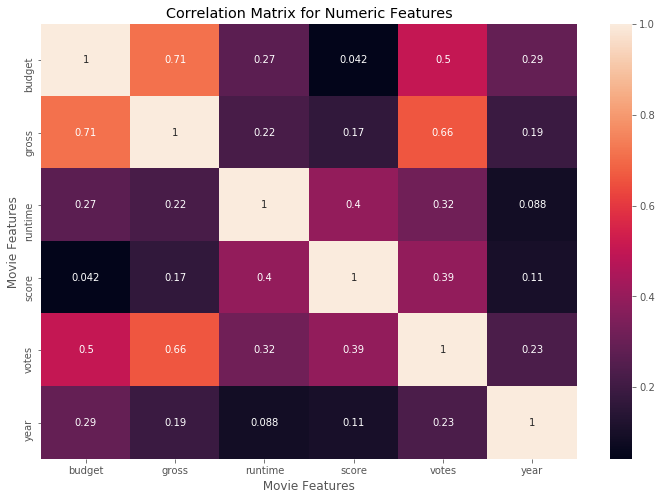

In [34]:
correlation_matrix = df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel(" Movie Features ")

plt.ylabel(" Movie Features ")

plt.show()

In [35]:
# Looking at the Company and converting every object into category

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

budget  company  country  director  genre      gross  name  rating  \
0       8000000      665       54      2192      1   52287414  4661       8   
1       6000000     1680       54      1296      4   70136369  1821       7   
2      15000000     1680       54      2645      0  179800601  6203       6   
3      18500000     2062       54      1066      0   85160248   295       8   
4       9000000     2122       54      2123      1   18564613  1872       6   
5       6000000     1158       53      1948      6  138530565  3903       8   
6      25000000     1160       53      1207      1   12729917  2883       6   
7       6000000      768       54       588      6    8551228   771       8   
8       9000000     1680       54      1004      4   40471663  3964       7   
9      15000000     1854       54       557      6   40456565  5306       8   
10      8800000     1827        2      2033      1  174635000  1238       7   
11     16000000     2024       53      2292      0    5900000  2306       8   
12      6000000     2062       54       612      4    8200000  3110       7   
13     25000000     2062       54      1267      0   11100000   686       7   
14     15000000      768       54      1792      5    8620929  3196       8   
15     17000000     1752       54        28      6    6734844    93       8   
16     10000000      768       54      2447      0    7433663  3248       8   
17     25000000     1052       54       811      4   38747385  3022       7   
18      2700000     1579       54      1845      0    3500000  6093       7   
19     35000000     2085       54      2699      0   16295774  2413       6   
20      2000000     1582       54      2441      0   13167232  1236       7   
21     11000000     1646       54        50      4   91258000   523       7   
22      4700000      508       54      2582      4    8025872  5978      12   
23     15000000     1280       54       459      0   42724017  2242       8   
24     25000000     1680       54      1562      1  109713132  4668       6   
25            0     2050       54      1258      4   40697761  4451       6   
26            0     1575       27      1138      5    7153487  5696       8   
27            0     2050       54      2391      0   24159872  2590       7   
28     25000000     1680       54      1805      0   79817937  5350       7   
29      1900000     1158       54      2570      5    4600000  4177       8   
30     25000000     1343       54      1303      4   39246734  6728       6   
31     25000000     2123       54       889      0   49042224  1122       8   
32            0     1049       16      1139      6    2003822   654       5   
33     24500000     2123       53      2264      1   17218023  5672       6   
34     13800000     2041       54      1702      6   52293982  5137       8   
35            0      665       54      1283      0  115103979  5511       6   
36            0     1424       54      1906      6    7177431  5078       6   
37      6000000     1124       54      2214     14    5844868  5416       8   
38     10000000      142       54      2145      4   37499651  5676       6   
39      3000000     1680       54      2612      9   19472057  2640       8   
40     25000000     2016       54      2068      1   14302779  5683       6   
41            0     2085       54       671      2   47483002   371       2   
42      4000000     1244       53        71      3    2826523  4473       8   
43     10000000      768       54      1287      0    4711220  2790       7   
44      4500000      866       54      2498      9    1261000  1964       8   
45     18000000     2050       54       794      4   41382841  3844       7   
46     19000000     1018       54       297      9   40996665  3929       7   
47      1100000      866       54      1265      4    5450815  6258       7   
48            0     1515       54      2043      0   38500726  4252       8   
49            0     1151       54      1805      4   262855

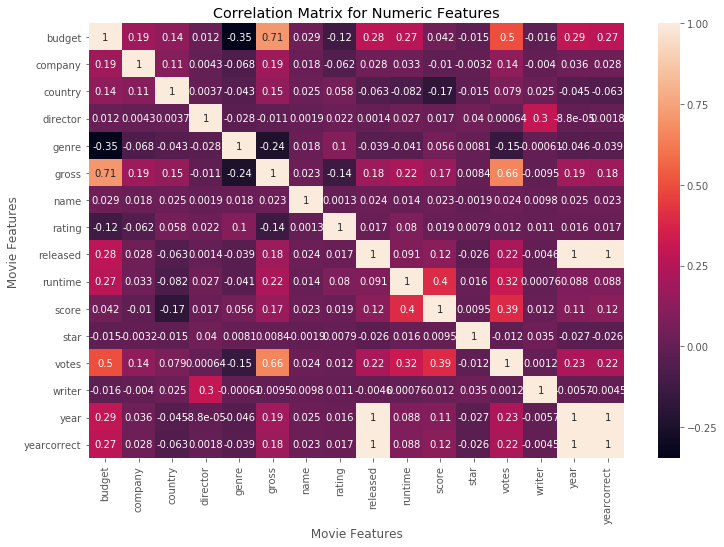

In [36]:
correlation_matrix = df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel(" Movie Features ")

plt.ylabel(" Movie Features ")

plt.show()

In [40]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs


budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.276635
             runtime        0.268226
             score          0.042145
             star          -0.015061
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.274820
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             released       0.027898
             runtime        0.033058
             score         -0.010426
 

In [41]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
country      score         -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
genre        company       -0.068330
company      genre         -0.068330
country      yearcorrect   -0.062707
yearcorrect  country       -0.062707
country      released      -0.062609
released     country       -0.062609
rating       company       -0.062250
company      rating        -0.062250
year         genre         -0.046259
genre        year          -0.046259
country      year          -0.045204
year         country       -0.045204
genre        country       -0.042793
c

In [43]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y

# Votes and Budget have the highest correlation to gross earnings